## Problem Statement

1. To visualise a model which can help the businesses to examine ideal customers.

2. To identify customers that the business needs to focus on for better Sales in the future.

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

### 2. Data Preparation

The initial steps for data preparation includes the following parts-

1. Data Loading.
2. Identifying null attributes
3. Dropping null values
____________________________________________________________________________________________________________________________



#### 1. Data Loading
To import the dataset "Marketing Campaign" from CSV file, pandas library's "pd.read_csv" function is used. This will help to view and understand the total number of attributes in a dataset.

In [3]:
Customer_Data = pd.read_csv('marketing_campaign.csv')
#sep="\t"
print("Number of datapoints:", len(Customer_Data))
Customer_Data

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13/06/13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/06/14,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25/01/14,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24/01/14,8,428,...,3,0,0,0,0,0,0,3,11,0


#### 2. Identifying null attributes
Using .info() function, to view the null & non-null count in the Dataset "Customer_Data".

In [4]:
Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### 3. Dropping Null Values
Dropping the "Null" values from the Customer_data to make it more precise for analysis.

In [5]:
Customer_Data = Customer_Data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(Customer_Data))
Customer_Data.info()

The total number of data-points after removing the rows with missing values are: 2216
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  Mn

### 3. Feature Engineering 

The further steps for data preparation includes Feature Engineering, which is divided into four parts, namely -
1. Association of Customer with the Company.
2. Attributes Grouping
3. Creation of Classifying Attributes 
4. Streamling Columns
5. Outlier Identification & Elimination


##### 1. Association of Customer with the Company

a. Using the "pd.to_datetime" function, the datetime values in the "Dt_Customer" column in the "Customer_Data" dataframe are converted to the date format.

In [6]:
 Customer_Data["Dt_Customer"] = pd.to_datetime(Customer_Data["Dt_Customer"])
 dates = []
 for i in Customer_Data["Dt_Customer"]:
        i = i.date()
        dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


b. A feature "Customer_For" is created to calculate the number of days the customer has been associated with the business,customers started to shop in the store relative to the last recorded date

In [7]:
#Created a feature "Customer_For(in days)"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(str(delta)[:-13:])
Customer_Data["Customer_For(in days)"] = days
Customer_Data["Customer_For(in days)"] = pd.to_numeric(Customer_Data["Customer_For(in days)"], errors="coerce")

##### 2. Attributes Grouping

In [8]:
#Feature Engineering
#Age of customer today 
Customer_Data["Age"] = 2014-Customer_Data["Year_Birth"]

#Total spendings on various items
Customer_Data["Spent"] = Customer_Data["MntWines"]+ Customer_Data["MntFruits"]+ Customer_Data["MntMeatProducts"]+ Customer_Data["MntFishProducts"]+ Customer_Data["MntSweetProducts"]+ Customer_Data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
Customer_Data["Living_With"]=Customer_Data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
Customer_Data["Children"]=Customer_Data["Kidhome"]+Customer_Data["Teenhome"]

#Feature for total members in the householde
Customer_Data["Family_Size"] = Customer_Data["Living_With"].replace({"Alone": 1, "Partner":2})+ Customer_Data["Children"]

#Feature pertaining parenthood
Customer_Data["Is_Parent"] = np.where(Customer_Data.Children> 0, 1, 0)

#Segmenting education levels in three groups
Customer_Data["Education"]=Customer_Data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# Feature pertaining Deals Accepted by customer
Customer_Data["Deals_Accepted"] = np.where(Customer_Data.NumDealsPurchases== 0, 'No', 'Yes')



##### 3. Creation of Classifying Attributes

In [9]:
cut_labels_Age = ['Young', 'Adult','Mature', 'Senior']
cut_bins_Age = [0,18, 40, 60, 120]
Customer_Data['Age_group'] = pd.cut(Customer_Data['Age'], bins=cut_bins_Age, labels=cut_labels_Age)

cut_labels_income = ['Low','Medium','High']
cut_bins_income = [0, 25000,65000,170000]
Customer_Data['Income_group'] = pd.cut(Customer_Data['Income'], bins=cut_bins_income, labels=cut_labels_income)

cut_labels_seniority = ['New','Old']
cut_bins_seniority = [0,513, 1200]
Customer_Data['Seniority_group'] = pd.cut(Customer_Data['Customer_For(in days)'], bins=cut_bins_seniority, labels=cut_labels_seniority)

cut_labels_spend = ['Low','Medium' ,'High']
cut_bins_spend = [0, 400,800,2600]
Customer_Data['Spend_group'] = pd.cut(Customer_Data['Spent'], bins=cut_bins_spend, labels=cut_labels_spend)

Customer_Data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Spent,Living_With,Children,Family_Size,Is_Parent,Deals_Accepted,Age_group,Income_group,Seniority_group,Spend_group
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,1617,Alone,0,1,0,Yes,Mature,Medium,Old,High
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,27,Alone,2,3,1,Yes,Mature,Medium,New,Low
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,776,Partner,0,2,0,Yes,Mature,High,New,Medium
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,53,Partner,1,3,1,Yes,Adult,Medium,New,Low
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,422,Partner,1,3,1,Yes,Adult,Medium,New,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,1341,Partner,1,3,1,Yes,Mature,Medium,Old,High
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-10-06,56,406,...,444,Partner,3,5,1,Yes,Senior,Medium,New,Medium
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,1241,Alone,0,1,0,Yes,Adult,Medium,New,High
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,843,Partner,1,3,1,Yes,Mature,High,New,High


##### 4. Streamling Columns

Renaming some columns for legibility and dropping redundant columns.

In [10]:
#Renaming columns for legibility
Customer_Data=Customer_Data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
Customer_Data=Customer_Data.rename(columns={"NumWebPurchases": "Web Purchases","NumCatalogPurchases":"Catalog Purchases", "NumStorePurchases": "Store Purchases"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
Customer_Data = Customer_Data.drop(to_drop, axis=1)
Customer_Data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Spent,Living_With,Children,Family_Size,Is_Parent,Deals_Accepted,Age_group,Income_group,Seniority_group,Spend_group
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1617,Alone,0,1,0,Yes,Mature,Medium,Old,High
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,27,Alone,2,3,1,Yes,Mature,Medium,New,Low
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,776,Partner,0,2,0,Yes,Mature,High,New,Medium
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,53,Partner,1,3,1,Yes,Adult,Medium,New,Low
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,422,Partner,1,3,1,Yes,Adult,Medium,New,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,1341,Partner,1,3,1,Yes,Mature,Medium,Old,High
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,444,Partner,3,5,1,Yes,Senior,Medium,New,Medium
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,1241,Alone,0,1,0,Yes,Adult,Medium,New,High
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,843,Partner,1,3,1,Yes,Mature,High,New,High


##### 5. Outlier Identification & Elimination

I. Identifying outliers using pairplot on selected attributes.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

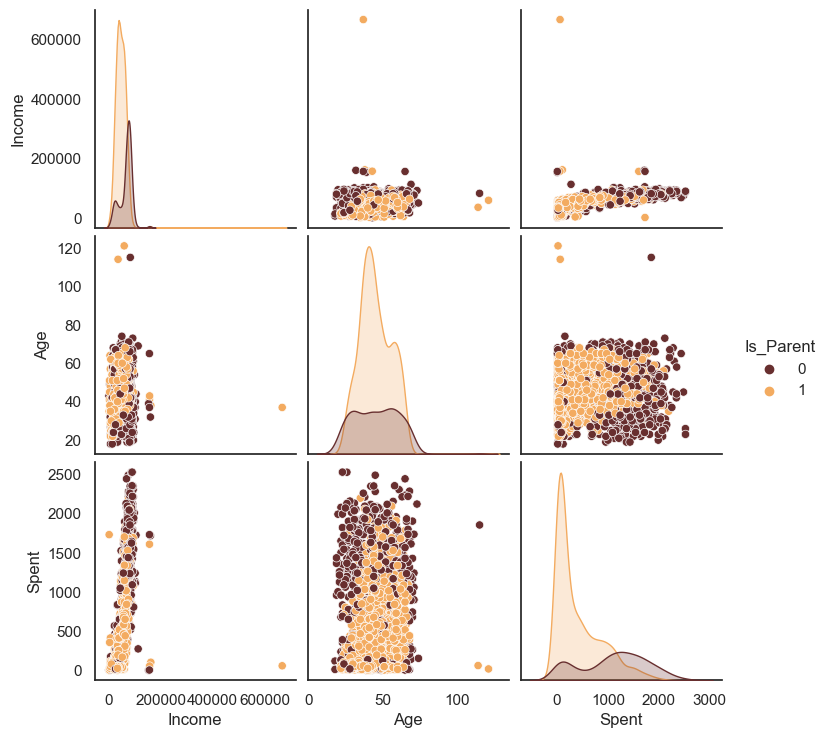

In [11]:
#To plot some selected features for outlier identification.
sns.set_theme(style="white")
#Setting up colors prefrences
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
#Plotting following features
To_Plot = [ "Income", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
#Taking hue 
sns.pairplot(Customer_Data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

II. Elimination of Outliers from attributes "Age" & "Income".

In [12]:
#Dropping the outliers by setting a cap on Age and income. 
Customer_Data = Customer_Data[(Customer_Data["Age"] < 90) & (Customer_Data["Income"] < 300000)]
print("The total number of data-points after removing the outliers are:", len(Customer_Data))
Customer_Data.info()

The total number of data-points after removing the outliers are: 2212
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Education              2212 non-null   object  
 1   Income                 2212 non-null   float64 
 2   Kidhome                2212 non-null   int64   
 3   Teenhome               2212 non-null   int64   
 4   Recency                2212 non-null   int64   
 5   Wines                  2212 non-null   int64   
 6   Fruits                 2212 non-null   int64   
 7   Meat                   2212 non-null   int64   
 8   Fish                   2212 non-null   int64   
 9   Sweets                 2212 non-null   int64   
 10  Gold                   2212 non-null   int64   
 11  NumDealsPurchases      2212 non-null   int64   
 12  Web Purchases          2212 non-null   int64   
 13  Catalog Purchases      

### 4. Finalizing Dataset

I. The Final Dataset is prepared by dropping NA values caused due to "Seniority_group" classification (Step 3.  Creation of Classifying Attributes).

In [13]:
Customer_Data=Customer_Data.dropna()

II. Dropping the columns that are not required during Data Visualization.

In [14]:
drop_columns = ['Kidhome', 'Teenhome', 'Wines','Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',]
Customer_FinalData = Customer_Data.drop(drop_columns, axis=1)
Customer_FinalData.describe()

,Income,Recency,Web Purchases,Catalog Purchases,Store Purchases,Customer_For(in days),Age,Spent,Children,Family_Size,Is_Parent
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,51967.259159,49.028494,4.090005,2.673451,5.807779,512.375848,45.085029,607.535504,0.947987,2.593849,0.714609
std,21528.480386,28.946535,2.741428,2.927652,3.251126,232.348697,11.704082,602.518345,0.749364,0.905807,0.451703
min,1730.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35284.000000,24.000000,2.000000,0.000000,3.000000,340.000000,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51373.000000,49.000000,4.000000,2.000000,5.000000,513.000000,44.000000,397.000000,1.000000,3.000000,1.000000
75%,68487.000000,74.000000,6.000000,4.000000,8.000000,686.000000,55.000000,1048.000000,1.000000,3.000000,1.000000
max,162397.000000,99.000000,27.000000,28.000000,13.000000,1063.000000,74.000000,2525.000000,3.000000,5.000000,1.000000


In [15]:
#This is the Final Dataset to be used for Attribute Correlation followed by Visualization.
Customer_FinalData

,Education,Income,Recency,Web Purchases,Catalog Purchases,Store Purchases,Customer_For(in days),Age,Spent,Living_With,Children,Family_Size,Is_Parent,Deals_Accepted,Age_group,Income_group,Seniority_group,Spend_group
0,Graduate,58138.0,58,8,10,4,971.0,57,1617,Alone,0,1,0,Yes,Mature,Medium,Old,High
1,Graduate,46344.0,38,1,1,2,125.0,60,27,Alone,2,3,1,Yes,Mature,Medium,New,Low
2,Graduate,71613.0,26,8,2,10,472.0,49,776,Partner,0,2,0,Yes,Mature,High,New,Medium
3,Graduate,26646.0,26,2,0,4,65.0,30,53,Partner,1,3,1,Yes,Adult,Medium,New,Low
4,Postgraduate,58293.0,94,5,3,6,321.0,33,422,Partner,1,3,1,Yes,Adult,Medium,New,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,9,3,4,541.0,47,1341,Partner,1,3,1,Yes,Mature,Medium,Old,High
2236,Postgraduate,64014.0,56,8,2,5,61.0,68,444,Partner,3,5,1,Yes,Senior,Medium,New,Medium
2237,Graduate,56981.0,91,2,3,13,315.0,33,1241,Alone,0,1,0,Yes,Adult,Medium,New,High
2238,Postgraduate,69245.0,8,6,5,10,316.0,58,843,Partner,1,3,1,Yes,Mature,High,New,High


In [16]:
Customer_FinalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Education              2211 non-null   object  
 1   Income                 2211 non-null   float64 
 2   Recency                2211 non-null   int64   
 3   Web Purchases          2211 non-null   int64   
 4   Catalog Purchases      2211 non-null   int64   
 5   Store Purchases        2211 non-null   int64   
 6   Customer_For(in days)  2211 non-null   float64 
 7   Age                    2211 non-null   int64   
 8   Spent                  2211 non-null   int64   
 9   Living_With            2211 non-null   object  
 10  Children               2211 non-null   int64   
 11  Family_Size            2211 non-null   int64   
 12  Is_Parent              2211 non-null   int64   
 13  Deals_Accepted         2211 non-null   object  
 14  Age_group              2211 non-null   c

### 5. Attribute Correlation

Using Pearson Correlation Matrix to determine the relationship between continuous variables in the Dataset "Customer_FinalData"

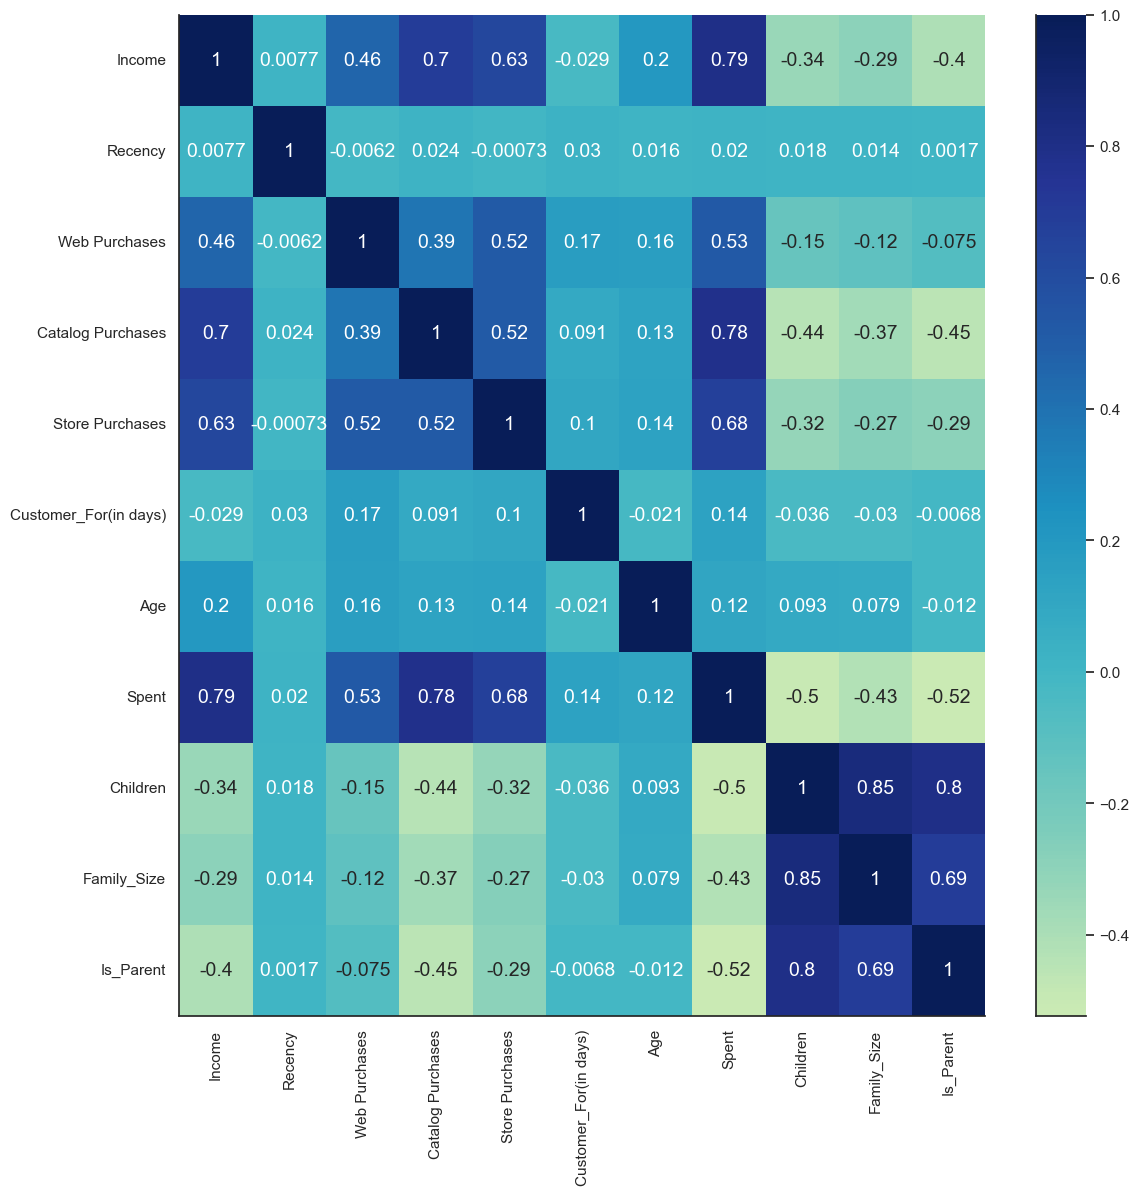

In [17]:
#Pearson correlation matrix
corrmat= Customer_FinalData.corr()
plt.figure(figsize=(13,13))  
sns.heatmap(corrmat,annot=True,annot_kws={'fontsize':14},cmap="YlGnBu",center=0)
sns.set_context('notebook')
sns.despine()

### 6. Data Visulizations

To address the Problem Statement, five hypotheses statements are formulated as below:

1. Customers from Mature Age group with High income have high spending behaviour.
2. Customers with bigger Family Size have high spending behaviour.
3. Customers who are associated for a long time with high income have high spending behaviour.
4. Customers who are highly educated and have high income have highest spending behaviour.
5. Customers with lower income have higher tendency to accept deals offered by the business.

-----------------------------------------------------------------------------------------------------

For each Hypotheses testing, two steps are performed -

I. Classification of related attributes of respective Hypotheses [using groupby() function]

II. Visulizing the formulated attributes and their relation using a Seaborn plot.

##### 1. Hypotheses I - Customers from Mature Age group with High income have high spending behaviour

In [18]:
#Classification of related attributes of respective Hypotheses [using groupby() function]
age_grouped = Customer_FinalData.groupby(['Age_group', 'Income_group'])
Age_Group = age_grouped['Spent'].sum().reset_index()
Age_Group

,Age_group,Income_group,Spent
0,Young,Low,138
1,Young,Medium,0
2,Young,High,0
3,Adult,Low,11371
4,Adult,Medium,133252
5,Adult,High,306629
6,Mature,Low,5646
7,Mature,Medium,260977
8,Mature,High,427976
9,Senior,Low,263


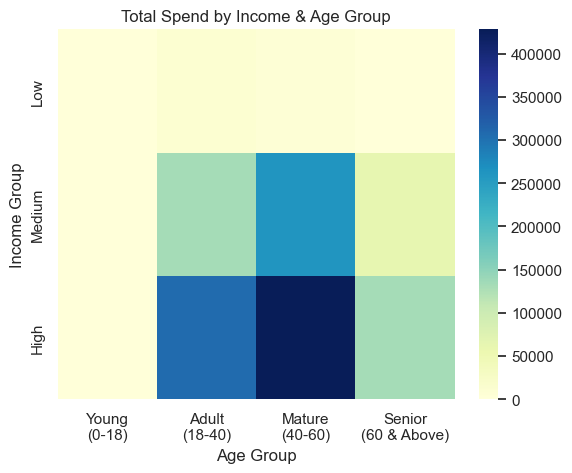

In [19]:
sns.set_theme(style="white")
# First pivot the data to have 'Age_group' on the x-axis and 'Income_group' on the y-axis
Age_Group_pivot = Age_Group.pivot(index='Income_group', columns='Age_group', values='Spent')

# Plot the heatmap
sns.heatmap(Age_Group_pivot, xticklabels=['Young\n(0-18)','Adult\n(18-40)','Mature\n(40-60)','Senior\n(60 & Above)'], cmap="YlGnBu")
plt.xticks(rotation=0)
# Add labels
plt.xlabel('Age Group')
plt.ylabel('Income Group')
plt.title('Total Spend by Income & Age Group')

# Show the plot
plt.show()

###### Hypotheses 1 is True: It is observed that, customers from Mature Age group with High income have high spending behaviour. 
-----------------------------------------------------------------------------------------------------------

##### Hypotheses 2: Customers with bigger Family Size have high spending behaviour.

In [20]:
#Classification of related attributes of respective Hypotheses [using groupby() function]
family_grouped = Customer_FinalData.groupby(['Living_With', 'Children'])
Family_group = family_grouped['Spent'].sum().reset_index()
Family_group

,Living_With,Children,Spent
0,Alone,0,279006
1,Alone,1,173628
2,Alone,2,33283
3,Alone,3,3505
4,Partner,0,418747
5,Partner,1,356463
6,Partner,2,69359
7,Partner,3,9270


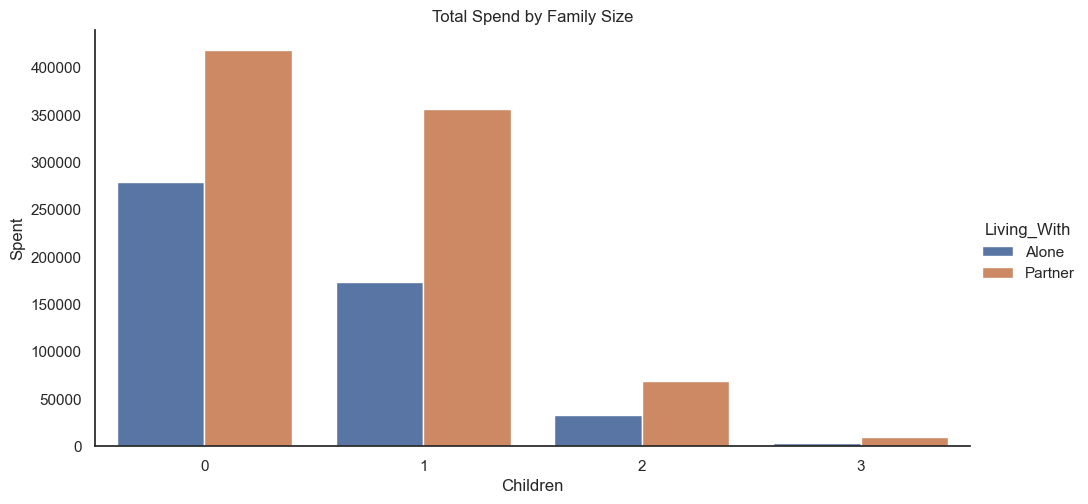

In [21]:
sns.set_theme(style="white")
sns.catplot(x='Children', y='Spent', hue='Living_With', data=Family_group, kind='bar', height=5, aspect=2)
plt.xlabel('Children')
plt.ylabel('Spent')
plt.title('Total Spend by Family Size')
plt.show()

##### Hypotheses 2 is False: It is observed that, customers with a bigger Family Size spend low on products.
______________________________________________________________________________________________________________________________

##### Hypotheses 3: Customers who are associated for a long time with high income have high spending behaviour.

In [22]:
#Classification of related attributes of respective Hypotheses [using groupby() function]
grouped = Customer_FinalData.groupby(['Income_group', 'Seniority_group'])
Seniority_Data = grouped['Spent'].sum().reset_index()
Seniority_Data

,Income_group,Seniority_group,Spent
0,Low,New,5883
1,Low,Old,11535
2,Medium,New,161620
3,Medium,Old,295962
4,High,New,430038
5,High,Old,438223


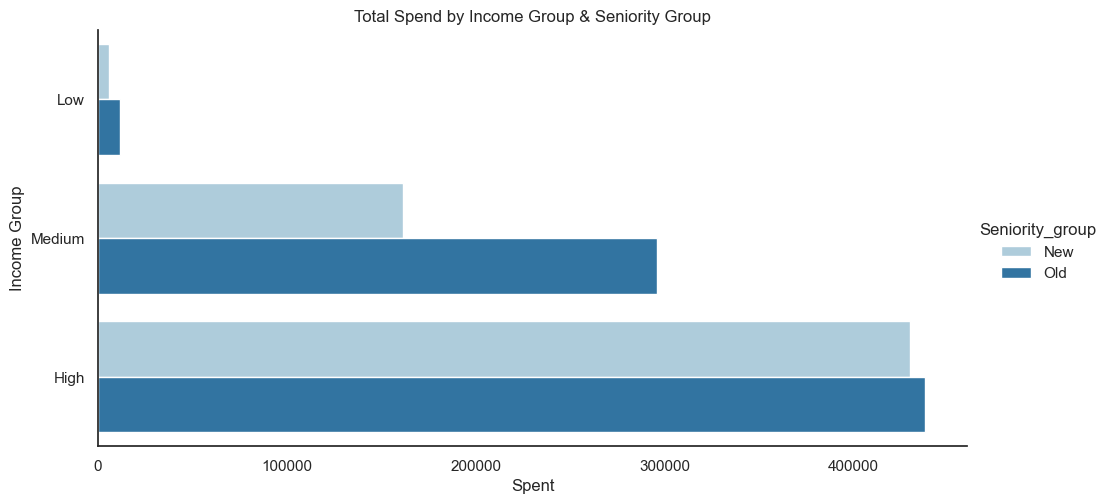

In [23]:
sns.set_palette("Paired")
sns.set_theme(style="white")

#Creating a catergory plot using the parameters mentioned followed by labelling axes and a title for the plot.
sns.catplot(x='Spent', y='Income_group', hue='Seniority_group', data=Seniority_Data, kind='bar', height=5, aspect=2,palette="Paired")
plt.xlabel('Spent')
plt.ylabel('Income Group')
plt.title('Total Spend by Income Group & Seniority Group')
plt.show()

##### Hypotheses 3 is True: It is observed that, customers who are associated for a long time with high income have high spending behaviour
______________________________________________________________________________________________________________________________

##### Hypotheses 4: Customers who are highly educated and have high income have highest spending behaviour.

In [24]:
#Classification of related attributes of respective Hypotheses [using groupby() function]
education_grouped = Customer_FinalData.groupby(['Income_group', 'Education'])
Education_group = education_grouped['Spent'].sum().reset_index()
Education_group

,Income_group,Education,Spent
0,Low,Graduate,9139
1,Low,Postgraduate,3125
2,Low,Undergraduate,5154
3,Medium,Graduate,224649
4,Medium,Postgraduate,192515
5,Medium,Undergraduate,40418
6,High,Graduate,459936
7,High,Postgraduate,350581
8,High,Undergraduate,57744


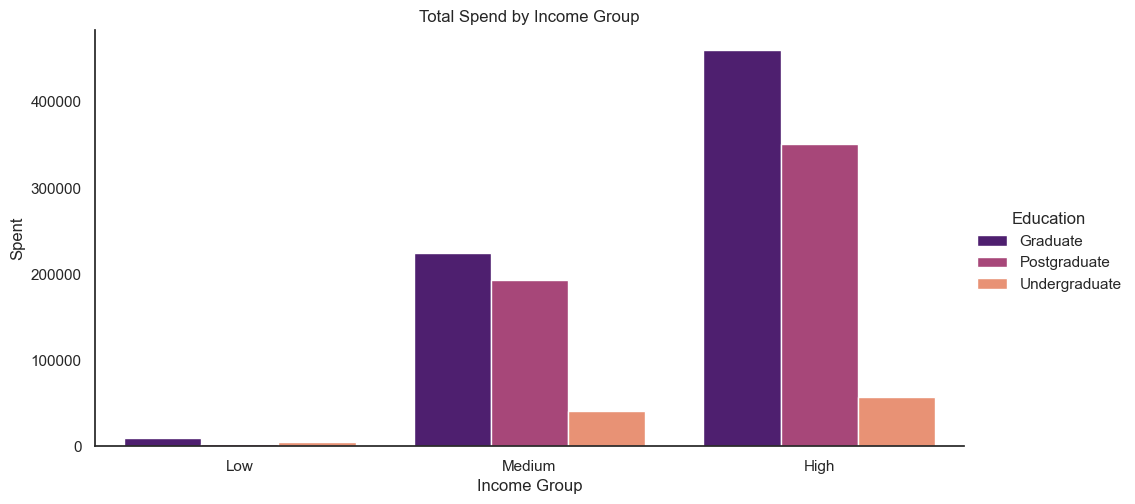

In [25]:
sns.set_theme(style="white")
sns.catplot(x='Income_group', y='Spent', hue='Education', data=Education_group, kind='bar', height=5, aspect=2,palette='magma')
plt.xlabel('Income Group')
plt.ylabel('Spent')
plt.title('Total Spend by Income Group')
plt.show()

##### Hypotheses 4 is False: It is observed that, customers who are graduates, irrespective of their Income, are the highest Spenders.
______________________________________________________________________________________________________________________________

##### Hypotheses 5: Customers with lower income have higher tendency to accept deals offered by the business.

Text(0.5, 1.0, 'Deals Accepted with respect to Income & Seniority')

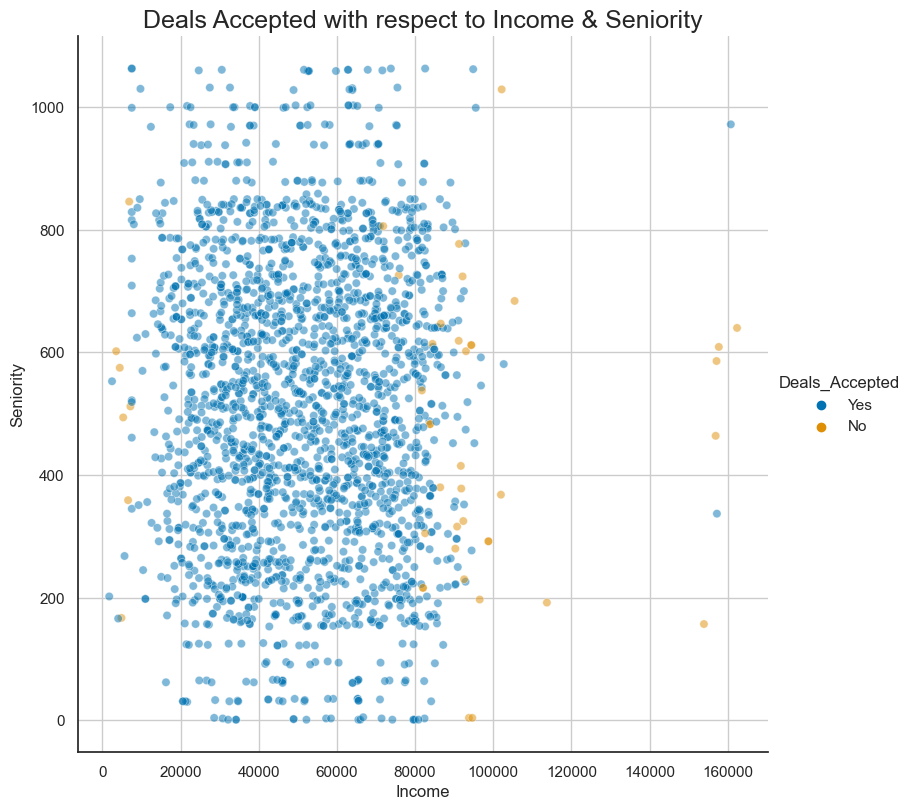

In [26]:
sns.set_theme(style="white")
sns.relplot(x = "Income",y = "Customer_For(in days)",hue ="Deals_Accepted",sizes = (300,400), alpha = 0.5, palette = "colorblind", height = 8, data = Customer_FinalData)
plt.grid()
plt.ylabel('Seniority')
sns.set_context('talk')
sns.despine()
sns.set_style('whitegrid')
plt.title('Deals Accepted with respect to Income & Seniority')

##### Hypotheses 5 is True: It is observed that, density of deals accepted is high near the average income and larger on below average income.
______________________________________________________________________________________________________________________________

### 7. Customer Segmentation

Based on the hypothesis that were true and looking at the Pearson correletion matrix, it was concluded that spent is highly correlated with Income and Seniority Group(Customer_For(in Days).
Four segments are formed to identify the customers that business needs to focus on for better performance:
##### 1. A-List: High Income, Old Customers
##### 2. Attention Required: Below Average Income, New Customers
##### 3. High Potential: High Income, New Customers
##### 4. Likely to Loose: Below Average Income, Old Customers
-----------------------------------------------------------------------------------------------------------------------------

Now, the following steps are performed to classify the customers into different segments:

In [27]:
#Categorise the customers baseon on their Income:
cut_labels_income_grp = ['Below Average', 'High']
cut_bins = [0, 51968,1000000]
Customer_FinalData['Income_Cluster'] = pd.cut(Customer_FinalData['Income'], bins=cut_bins, labels=cut_labels_income_grp, right=False)

In [28]:
#Grouping the customers on the basis of Income_Cluster(Below Average & High) and Seniority Group(New & Old)
income_grouped = Customer_FinalData.groupby(['Income_Cluster','Seniority_group'])
Income_group = income_grouped['Spent'].sum().reset_index()
Income_group

,Income_Cluster,Seniority_group,Spent
0,Below Average,New,61625
1,Below Average,Old,118146
2,High,New,535916
3,High,Old,627574


In [29]:
#Creation of a concatenated Cluster(Cluster_Customer) to classify the customers
def concat_columns(row):
    return row['Income_Cluster'] +'_' + row['Seniority_group']
Income_group['Cluster_Customer'] = Income_group.apply(concat_columns, axis=1)
Income_group = Income_group.sort_values('Spent', ascending=False)
Income_group

,Income_Cluster,Seniority_group,Spent,Cluster_Customer
3,High,Old,627574,High_Old
2,High,New,535916,High_New
1,Below Average,Old,118146,Below Average_Old
0,Below Average,New,61625,Below Average_New


In [30]:
#Assigning appropriate names to these customer clusters
Income_group["Cluster_Customer"]=Income_group["Cluster_Customer"].replace({"High_Old":"A-List", "High_New":"High Potential", "Below Average_Old":"Likely to Lose", "Below Average_New":"Attention Required"})
Income_group

,Income_Cluster,Seniority_group,Spent,Cluster_Customer
3,High,Old,627574,A-List
2,High,New,535916,High Potential
1,Below Average,Old,118146,Likely to Lose
0,Below Average,New,61625,Attention Required


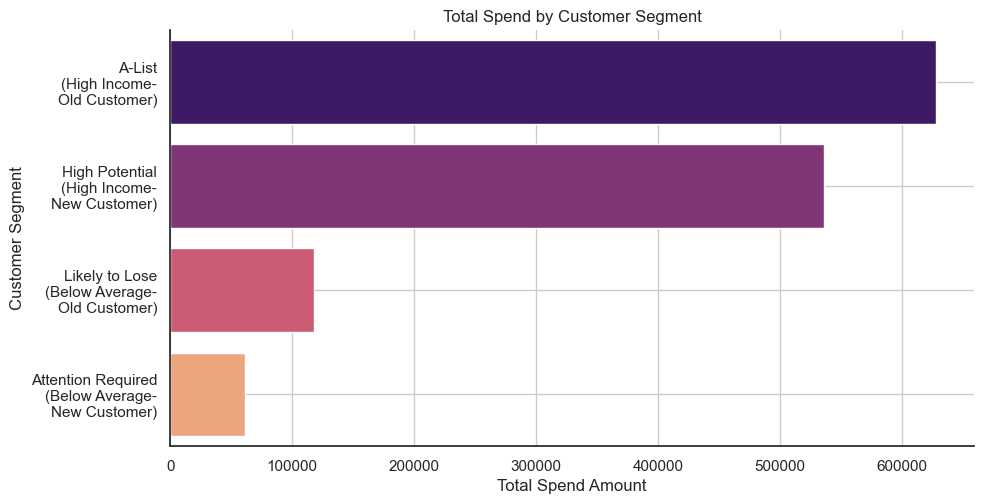

In [31]:
#Visualising the Spending behaviour of the customer segments
sns.set_theme(style="white")
g= sns.catplot(x='Spent', y='Cluster_Customer' ,data=Income_group, kind='bar', height=5, aspect=2,palette='magma')
plt.setp(g.ax.get_yticklabels(), rotation=0, ha='right')
g.ax.set_yticklabels(['A-List\n(High Income-\nOld Customer)','High Potential\n(High Income-\nNew Customer)','Likely to Lose\n(Below Average-\nOld Customer)','Attention Required\n(Below Average-\nNew Customer)'])

plt.xlabel('Total Spend Amount')
plt.ylabel('Customer Segment')
plt.title('Total Spend by Customer Segment')
sns.set_context('talk')
sns.despine()
sns.set_style('whitegrid')
plt.grid()

### 8. Obervations:

The Customer Segmentation with respect to Income group and Seniority group as displayed in the above plot provides an overall picture of which segment is to be priorized more and requires attention from the retail store's marketing team. 
1. For instance, High potential customers who are recently associated with the business and have a higher income could be given highest priority in order to retain them.
2. For, Likely to Lose customers it is important to understand the density of consumption of individual products so that those products can be offered to them at competitive prices.
3. Similarly for New Customers with Below Average Income that is, Attention Required segment it is important to understand the density of individual product consumption in order to offer deals to these customers so that they continue to shop from the store.
4. A List customers can be targeted with exclusive offers and premium experiences, such as VIP events and early access to new products. Additionally, personalized marketing and customer service can be provided to maintain their loyalty and satisfaction.
------------------------------------------------------------------------------------------------------------------------------

##### For an advanced solution, Clustering algorithm such as k-means and hierarchial could be used to group customers into different segments based on their spending habits and relevant characteristics. 
______________________________________________________________________________________________________________________________

The visualization of Contribution from Point of Sales is performed in Power BI. Majority of the customers prefer to go to store and buy products. Hence, we can improvise the online purcharsing and catalog purchasing platforms to optimise sales from these platforms.

Customer_FinalData.to_csv('Place.csv',index=False)